In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head(10)

,id,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,80378,-16.051,141.996,322.8,2.0,1.4,2019-12-03,1335,Terra,MODIS,100,6.0NRT,298.5,42.8,N
1,79962,-32.855,150.711,335.0,1.2,1.1,2019-12-03,405,Aqua,MODIS,84,6.0NRT,305.4,29.1,D
2,9680,-12.216,132.732,346.1,1.4,1.2,2019-10-12,435,Aqua,MODIS,90,6.0NRT,312.3,52.1,D
3,61999,-32.991,150.507,358.8,1.0,1.0,2019-11-19,350,Aqua,MODIS,99,6.0NRT,313.7,68.8,D
4,44632,-12.938,136.140,324.4,1.0,1.0,2019-11-10,1330,Terra,MODIS,100,6.0NRT,295.0,21.8,N
5,21929,-12.298,132.209,321.7,3.5,1.8,2019-10-23,415,Aqua,MODIS,19,6.0NRT,299.9,44.3,D
6,15356,-13.204,130.505,311.4,1.5,1.2,2019-10-18,1625,Aqua,MODIS,81,6.0NRT,294.4,17.9,N
7,103368,-32.661,120.226,310.8,3.5,1.8,2019-12-13,1405,Terra,MODIS,74,6.0NRT,294.2,54.9,N
8,21202,-14.122,127.063,308.7,2.3,1.5,2019-10-22,1435,Terra,MODIS,74,6.0NRT,294.9,23.0,N
9,34383,-28.299,152.587,309.2,1.4,1.2,2019-11-07,1250,Terra,MODIS,77,6.0NRT,291.7,14.7,N


In [4]:
data.dtypes

id              int64
latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version        object
bright_t31    float64
frp           float64
daynight       object
dtype: object

In [5]:
missing=data.isnull().any().any()

In [6]:
missing
data=data.drop(['acq_date'],axis=1)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label_encoders={}
df_coded=data.copy()
categorical_features = ['satellite', 'instrument', 'version', 'daynight']
for features in categorical_features:
    le=LabelEncoder()
    df_coded[features]=le.fit_transform(df_coded[features])

In [9]:
label_encoders[features]=le

C:\Users\youca\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


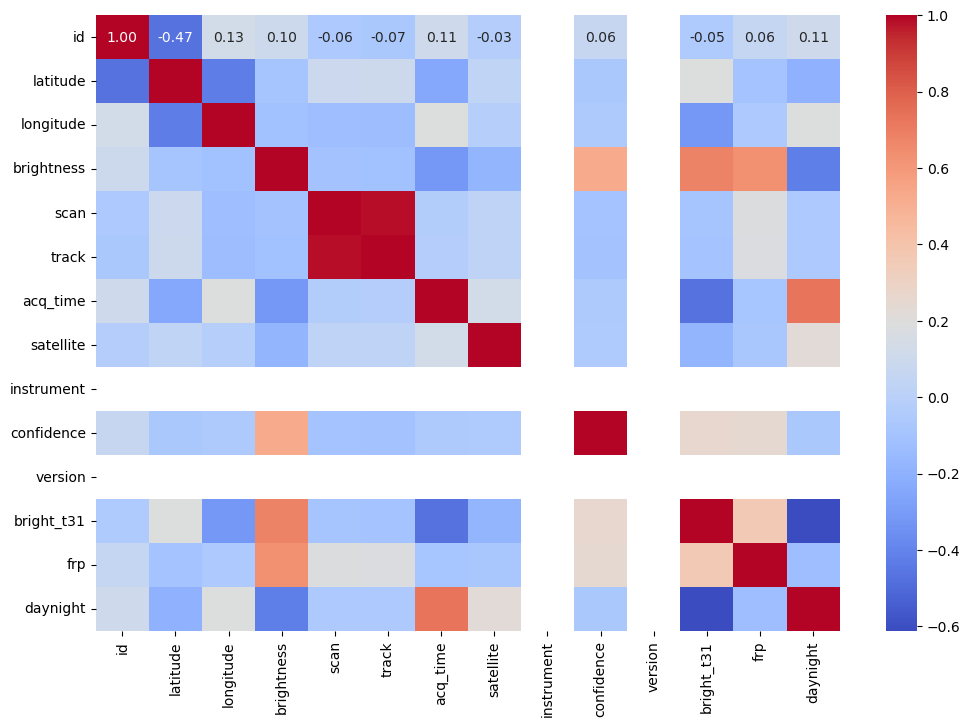

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df_coded.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [11]:
y=data['confidence']

In [12]:
X=data.drop(['instrument','version','scan','confidence'],axis=1)

In [13]:
X.satellite=X.satellite.map({'Terra':1,'Aqua':2})
X.daynight=X.daynight.map({'D':1,'N':2})

In [14]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=50)

In [15]:
model.fit(X,y)

RandomForestRegressor(n_estimators=50)

In [17]:
X_test=pd.read_csv('test.csv')
X_test.satellite=X_test.satellite.map({'Terra':1,'Aqua':2})
X_test.daynight=X_test.daynight.map({'D':1,'N':2})
X_test=X_test.drop(['acq_date','instrument','scan','version'],axis=1)

In [18]:
confidence=model.predict(X_test)

In [19]:
ID=X_test['id']

In [20]:
dataf={'id':ID,'confidence':confidence}

da=pd.DataFrame(dataf)

In [21]:
da.to_csv('outputfinal5.csv',index=False)